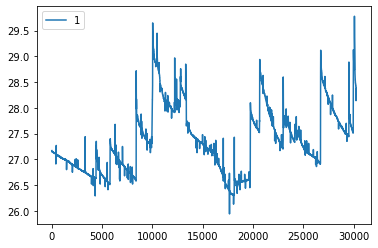

(30254, 2)


In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd

file="dataRTD.18787.txt"


noiseP=-30
noiseN=5

smoothP=-30
smoothN=15

baseP=-30
baseN=5

nowP=-10
nowN=5

threshold=5

series=read_csv(file, sep="\t", header=None,parse_dates=True)
series=series.values
series


series2 = pd.DataFrame(series)
series2.plot()
pyplot.show()

print(series.shape)

In [2]:
list(reversed(range(1,6)))

[5, 4, 3, 2, 1]

['06/09/2021 02:00:02' '06/09/2021 02:00:04' '06/09/2021 02:00:09' ...
 '06/10/2021 00:08:00' '06/10/2021 00:08:02' '06/10/2021 00:08:07']
[1623196802.0 1623196804.0 1623196809.0 ... 1623276480.0 1623276482.0
 1623276487.0]


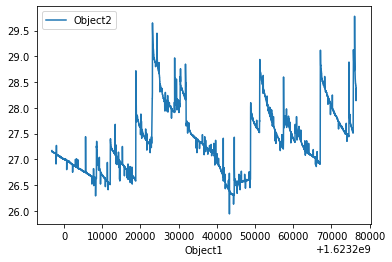

In [3]:
from datetime import datetime

print((series[:,0]))

for i in series:
    i[0]=datetime.strptime(i[0], '%m/%d/%Y %H:%M:%S').timestamp()

print((series[:,0]))

series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

In [4]:
def getSubWindow(v,i,incT):
    t0=v[i][0]
    ret=[]
    if(incT>0):
        for j in range(i+1,len(v)):
            if(v[j][0]<= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    else:
        for j in reversed(range(0,i-1)):
            if(v[j][0]>= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    return ret       

In [5]:
getSubWindow(series,11,-5)

def avg(lst):
    if(len(lst)==0):
        return -1
    return sum(lst) / len(lst)

print(getSubWindow(series,11,-15))
print(avg(getSubWindow(series,11,-15)))




[27.16, 27.16, 27.16, 27.16, 27.16]
27.160000000000004


In [6]:
def getSubWindowFP0(v,i,incTF, incTP):
    return getSubWindow(v,i,incTF)+(getSubWindow(v,i,incTP))
def getSubWindowFP(v,i,incTF, incTP):
    return getSubWindow(v,i,incTF)+(getSubWindow(v,i,incTP))+[v[i][1]]
getSubWindowFP(series,11,-5,10)

[27.16, 27.16, 27.16, 27.16, 27.16]

In [7]:
#Quitamos valores puntuales feos 0,-1
for i in range(0,len(series)):
    if(series[i][1]<=0):
        print(getSubWindowFP0(series,i,noiseP,noiseN),avg(getSubWindowFP0(series,i,noiseP,noiseN)))
        series[i][1]=avg(getSubWindowFP(series,i,noiseP,noiseN))
        

In [8]:
print(series)

[[1623196802.0 27.17]
 [1623196804.0 27.16]
 [1623196809.0 27.16]
 ...
 [1623276480.0 28.39]
 [1623276482.0 28.38]
 [1623276487.0 28.38]]


30254


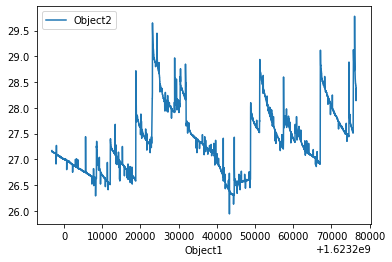

In [9]:
print(len(series))
series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

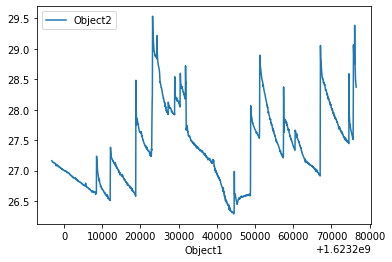

In [10]:
#Quitamos valores puntuales feos 0,-1
avg_series=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_series[i][1]=avg(getSubWindowFP(series,i,smoothP,smoothN))
        avg_series[i][0]=series[i][0]
series2 = pd.DataFrame({'Object1':avg_series[:,0],'Object2':avg_series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-09 08:07:11
2021-06-09 08:07:21
2021-06-09 08:07:23
2021-06-09 08:07:25
2021-06-09 08:07:28
2021-06-09 08:07:30
2021-06-09 08:07:32
2021-06-09 08:08:42
2021-06-09 08:08:45
2021-06-09 08:08:52
2021-06-09 09:39:14
2021-06-09 09:39:17
2021-06-09 09:39:19
2021-06-09 09:39:21
2021-06-09 09:39:24
2021-06-09 09:39:26
2021-06-09 10:56:29
2021-06-09 10:56:31
2021-06-09 10:56:33
2021-06-09 11:43:47
2021-06-09 11:43:49
2021-06-09 11:43:52
2021-06-09 11:43:54
2021-06-09 11:43:56
2021-06-09 11:43:58
2021-06-09 11:45:42
2021-06-09 11:45:52
2021-06-09 11:45:54
2021-06-09 11:45:57
2021-06-09 11:45:59
2021-06-09 11:46:02
2021-06-09 11:46:04
2021-06-09 11:46:09
2021-06-09 11:46:11
2021-06-09 11:46:14
2021-06-09 15:16:32
2021-06-09 15:16:35
2021-06-09 15:16:37
2021-06-09 15:16:40
2021-06-09 15:16:43
2021-06-09 15:16:45
2021-06-09 15:16:47
2021-06-09 15:16:49
2021-06-09 15:16:52
2021-06-09 18:51:36
2021-06-09 18:51:38
2021-06-09 18:51:43
2021-06-09 18:51:46
2021-06-09 18:51:48
2021-06-09 18:51:51


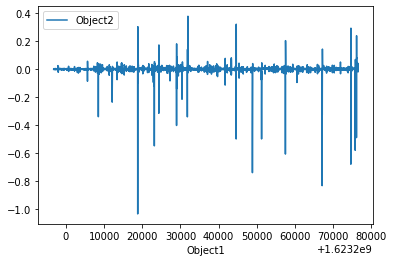

In [11]:
#Computamos bajadas

avg_up=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_up[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_up[i][0]=series[i][0]
        if(avg_up[i][1]>0.1):
            print( datetime.fromtimestamp(avg_up[i][0]))
series2 = pd.DataFrame({'Object1':avg_up[:,0],'Object2':avg_up[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-09 08:06:42
2021-06-09 08:06:44
2021-06-09 08:06:46
2021-06-09 08:06:48
2021-06-09 08:06:51
2021-06-09 08:06:53
2021-06-09 09:19:17
2021-06-09 09:19:20
2021-06-09 16:27:15
2021-06-09 16:27:17
2021-06-09 16:27:19
2021-06-09 18:51:12
2021-06-09 18:51:14
2021-06-09 18:51:16
2021-06-09 18:51:19
2021-06-09 21:31:23
2021-06-09 21:31:25
2021-06-09 21:31:27
2021-06-09 21:31:30
2021-06-09 21:31:32
2021-06-09 21:31:34
2021-06-09 23:36:38
2021-06-09 23:36:40
2021-06-09 23:36:42
2021-06-09 23:36:44
2021-06-09 23:36:46
2021-06-09 23:36:49
2021-06-09 23:55:47
2021-06-09 23:55:49


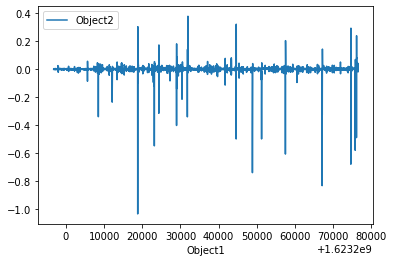

In [12]:
#Computamos subidas
avg_up=np.zeros((len(series),2))
avg_up_threshold=np.zeros((len(series),2))
f = open("rtd-down.tsv", "w")
for i in range(0,len(series)):
        avg_up[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_up[i][0]=series[i][0]
        avg_up_threshold[i][0]=series[i][0]
        f.write(str(datetime.fromtimestamp(avg_up[i][0]))+"\t")
        if(avg_up[i][1]<-0.5):
            print( datetime.fromtimestamp(avg_up[i][0]))
            avg_up_threshold[i][1]=1
            f.write("1\n")
        else:
            avg_up_threshold[i][1]=0
            f.write("0\n")
f.close()                 
series2 = pd.DataFrame({'Object1':avg_up[:,0],'Object2':avg_up[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

In [13]:
def fuzzyOneHot(v,t):
    toret=np.zeros((len(v),2))
    for i in range(0,len(v)):
        toret[i][0]=v[i][0]
        if(v[i][1]>0):
            toret[i][1]=1          
            for j in range(i+1,min(len(v),i+t)):
                toret[j][1]=1
            for j in reversed(range(max(0,i-t),i)):
                toret[j][1]=1
    return toret



v=[[0,0],[0,0],[0,0],[0,1],[0,0],[0,0]]
for i in fuzzyOneHot(v,2):
    print(i)

def aggregateMinute(v):

    dictionary = dict()
    for i in v: #
        ym = int(i[0]/60)    # the key is only the year month combination (i.e. '1998-01' for example)
        dictionary[ym] = max(dictionary.get(ym, 0) , i[1])  # return the value for that key or return default 0 (and create key)

    data_aggregated = [(key, val) for (key, val) in dictionary.items()] # if you need it back in old format
    toret=np.zeros((len(data_aggregated),2))
    i=0
    for (key, val) in data_aggregated:
        toret[i][0]=key
        toret[i][1]=val
        i=i+1
    return toret    


data_aggregated=aggregateMinute(avg_up_threshold)
data_aggregated=fuzzyOneHot(data_aggregated,3)
f = open("rtd-down-minute.tsv", "w")
for i in range(0,len(data_aggregated)):
    key=data_aggregated[i][0]
    val=data_aggregated[i][1]
    if val>0:
        f.write(str(datetime.fromtimestamp(key*60))+"\t1\n")
    else:
        f.write(str(datetime.fromtimestamp(key*60))+"\t0\n")
f.close()


[0. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 0.]
